
X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, max 1200.0, min 90.0

y:
mean 44291.96875, sdt 17326.06, max 75454.3828125, min 12384.0302734375


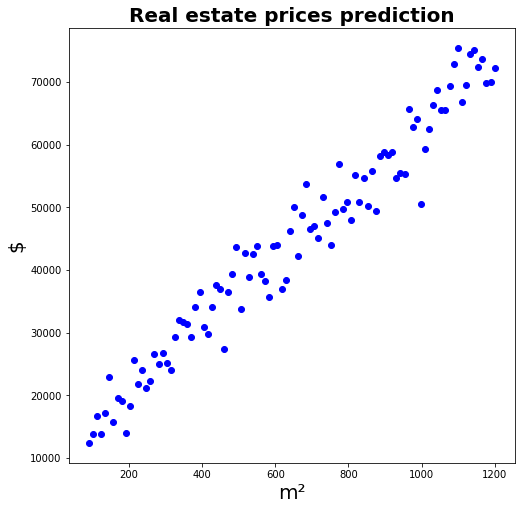

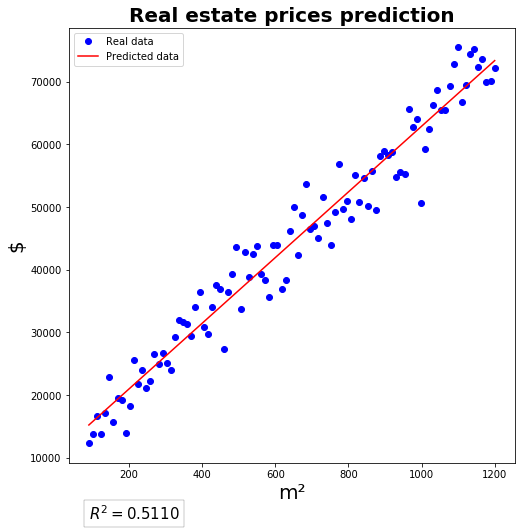

Tempo de execução da função de predição = 0.06907487(s)
Tem que ser em menos de 1 segundo 


In [3]:
#Estudante: Marcelo Schmitt     Número USP: 9297641
# all imports
import numpy as np
import time
#from util import get_housing_prices_data, plot_points_regression, r_squared
from util import get_housing_prices_data, r_squared
from plots import plot_points_regression


%matplotlib inline


X, y = get_housing_prices_data(N=100)


#X, y = get_housing_d_data(N=10000)

plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')


def normal_equation_prediction(X, y):
    """
    Calculates the prediction using the normal equation method.
    You should add a new row with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: prediction
    :rtype: np.ndarray(shape=(N, 1))
    """
    # Your code here
    
    #você precisa adicionar uma componente com apenas 1s a cada observação em X
    
    #print(np.shape(X))
    
    #X = np.array([X, np.ones(100, 1)]) #np.darray(X)
    #np.concatenate((a, b.T), axis=1)
    #print(np.shape(X), np.shape(X)[0])
    X = np.concatenate((X, np.ones((np.shape(X)[0], np.shape(X)[1]))), axis=1)
    #print(np.shape(X))
    #print(X)
    #dimensão (2, 100) * (100, 2) -> (2,2)
    #print(np.shape(np.linalg.inv(X.T.dot(X))))
    
    X_adaga = np.linalg.inv(X.T.dot(X)).dot(X.T)
    # (2,2) * (2, 100) -> (2,100)
    #print(np.shape(X_adaga))
    #print(X_adaga)
    # (2,100) * (100, 1)
    
    #print(np.shape(y))
    W = X_adaga.dot(y)
    #print(np.shape(W))
    
    #(100,2) * (2, 1) -> (100, 1)
    
    #prediction = None

    prediction = X.dot(W)
    return prediction


try:
    prediction = normal_equation_prediction(X, y)
    if prediction is None:
        raise NotImplementedError
    r_2 = r_squared(y, prediction)
    plot_points_regression(X,
                           y,
                           title='Real estate prices prediction',
                           xlabel="m\u00b2",
                           ylabel='$',
                           prediction=prediction,
                           legend=True,
                           r_squared=r_2)
except NotImplementedError:
    print("Falta fazer!")


try:
    X, y = get_housing_prices_data(N=1000000, verbose=False)
    init = time.time()
    prediction = normal_equation_prediction(X, y)
    if prediction is None:
        raise NotImplementedError
    init = time.time() - init
    print("Tempo de execução da função de predição = {:.8f}(s)".format(init))
    print("Tem que ser em menos de 1 segundo ")
    
except NotImplementedError:
    print("Falta fazer!")
